In [3]:
import os
import cv2
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import pandas as pd
from scipy.stats import mannwhitneyu

In [4]:
df = pd.read_csv('titanic.csv')

In [4]:
print(df.shape)
print(df.dtypes)

#отбор числовых колонок
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns.values
print(num_cols)

#отбор нечисловых колонок
df_non_num = df.select_dtypes(exclude=[np.number])
non_num_cols = df_non_num.columns.values
print(non_num_cols)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Отношение выживших и погибших мужчин/женщин')

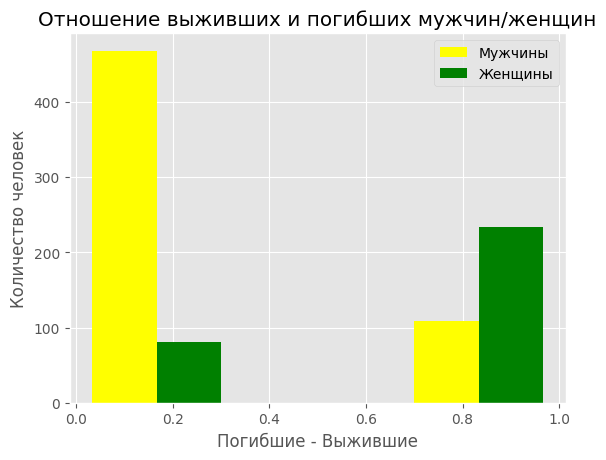

In [6]:
x1 = list(df[df['Sex'] == 'male']['Survived'])
x2 = list(df[df['Sex'] == 'female']['Survived'])

#добовляем цвета колонкам и имена
colors = ['yellow', 'green']
names = ['Мужчины', 'Женщины']

#создаем гистограмму используя лист 
plt.hist([x1, x2], bins = int(180/60), color = colors, label=names)

#формирование графика
plt.legend()
plt.xlabel('Погибшие - Выжившие')
plt.ylabel('Количество человек')
plt.title('Отношение выживших и погибших мужчин/женщин')

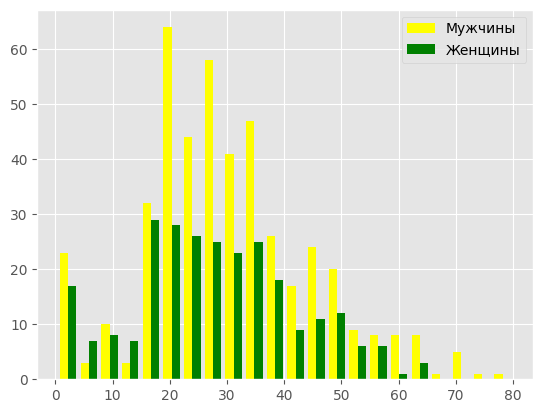

In [12]:
x1 = list(df[df['Sex'] == 'male']['Age'])
x2 = list(df[df['Sex'] == 'female']['Age'])

colors = ['yellow', 'green']
names = ['Мужчины', 'Женщины']

plt.hist([x1, x2], bins = int(180/8), color = colors, label=names)

plt.legend()


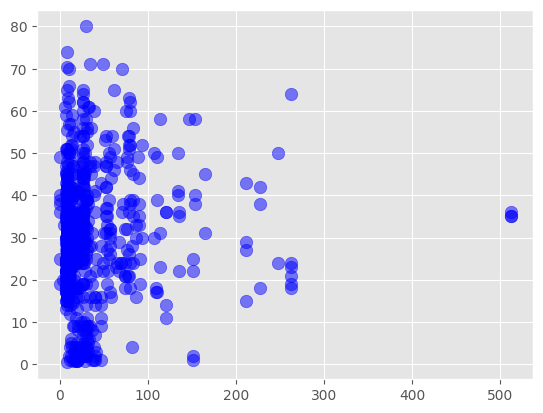

In [29]:
x = df['Fare']
y = df['Age']

colors = ['blue']

area = 80

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

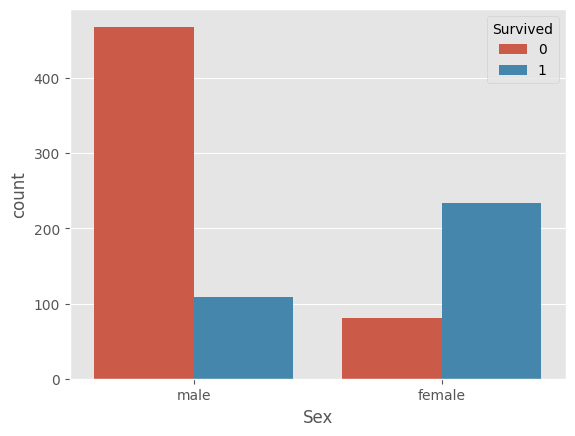

In [32]:
sns.countplot(x = 'Sex', hue = 'Survived',data = df)

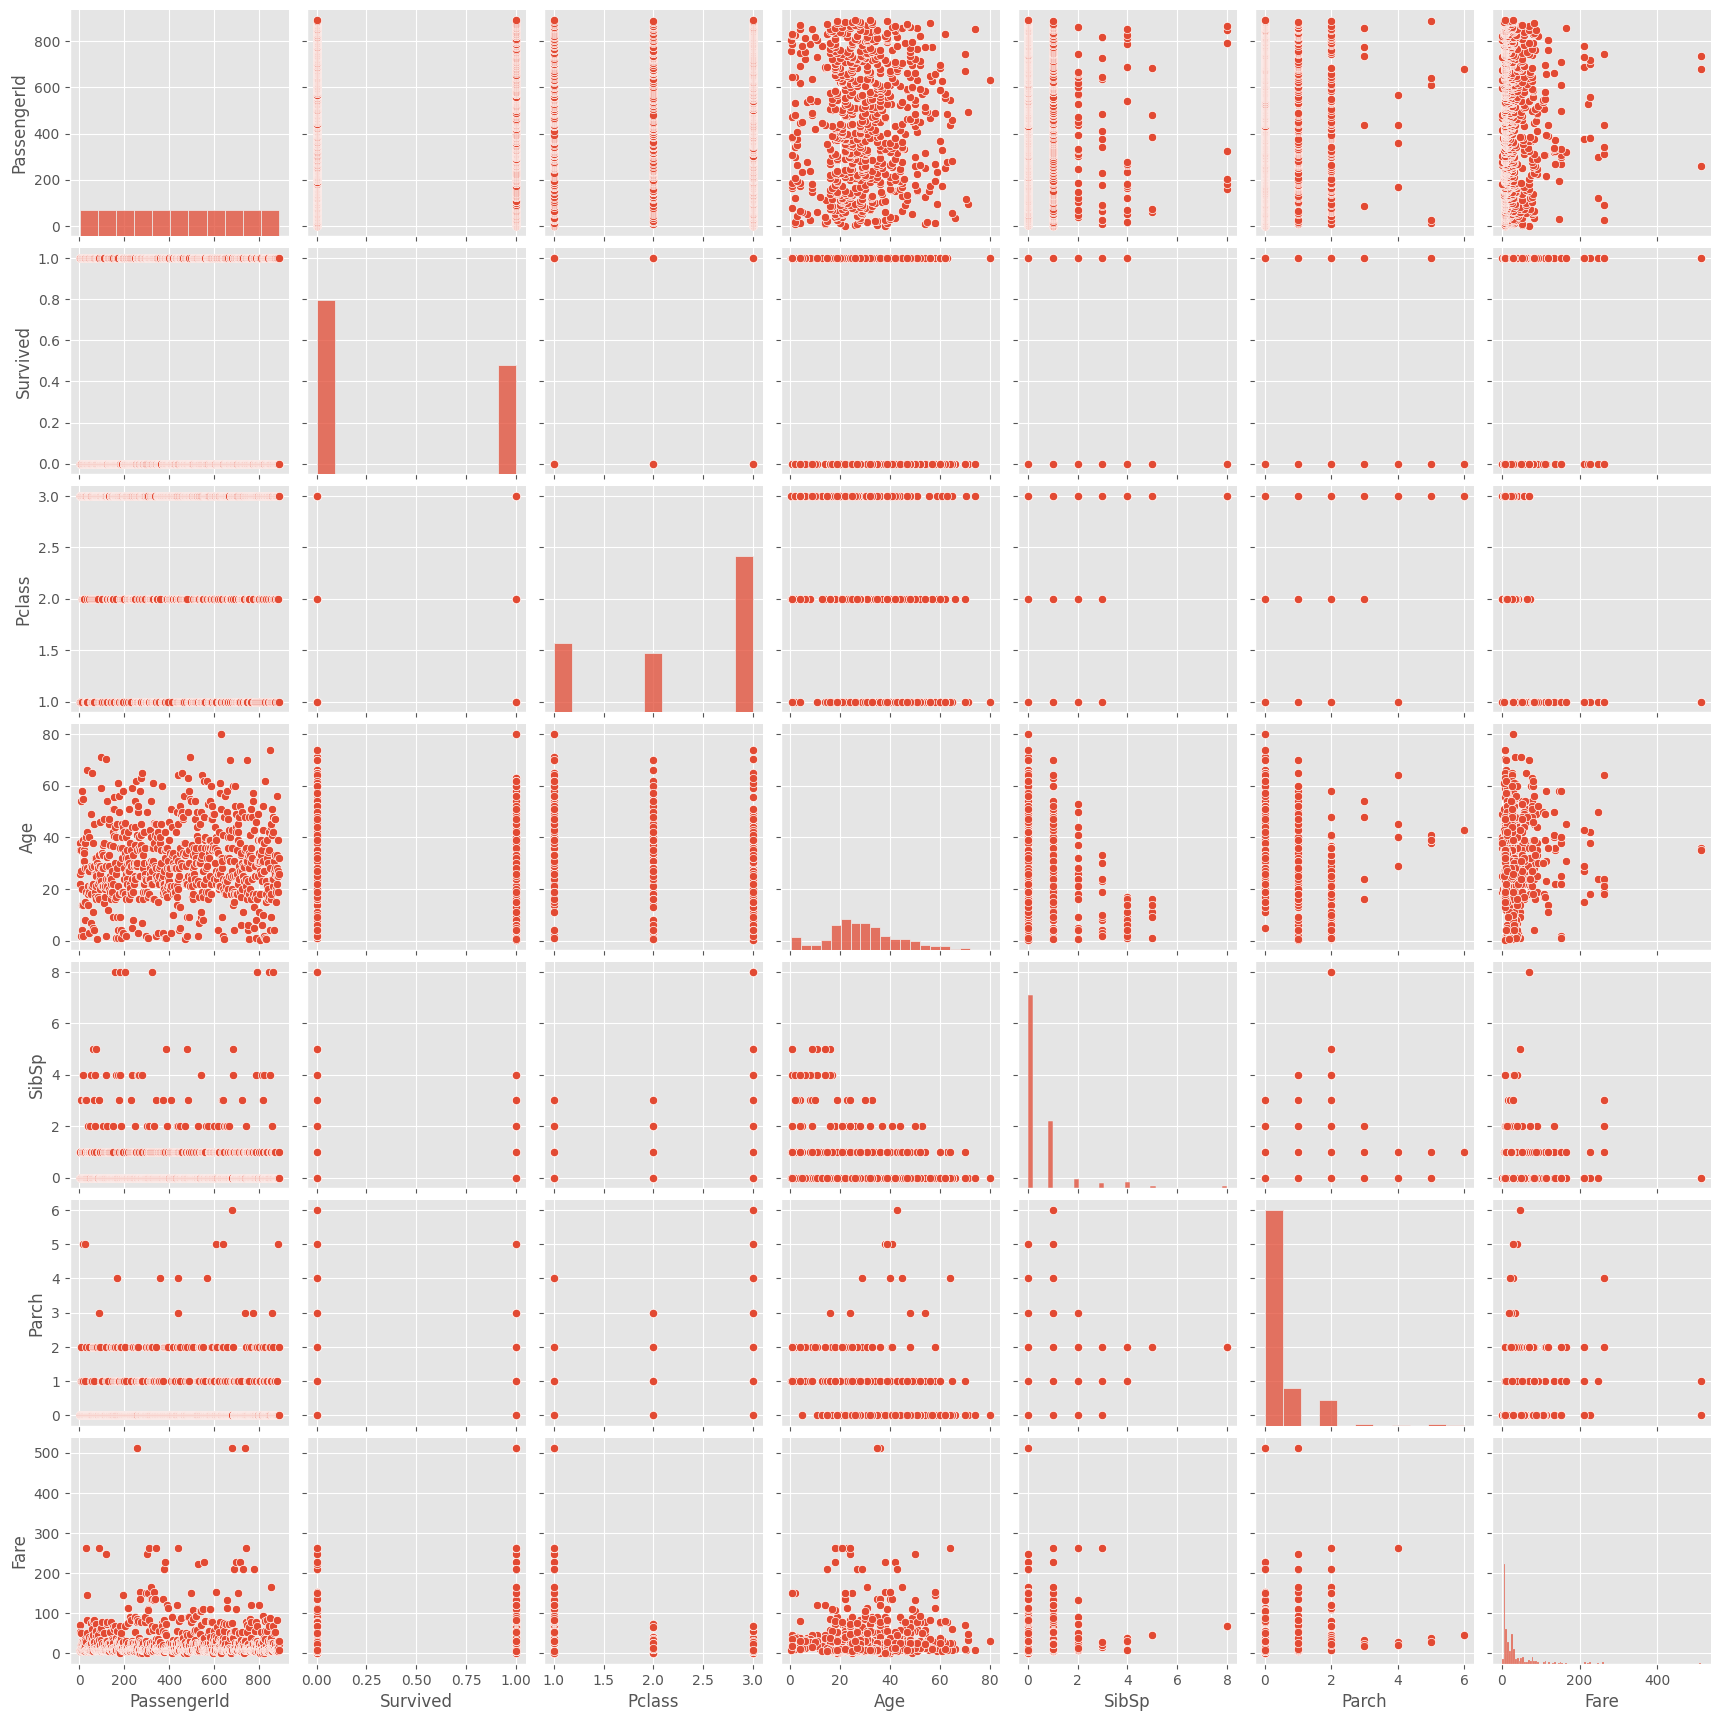

In [5]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Sex'>

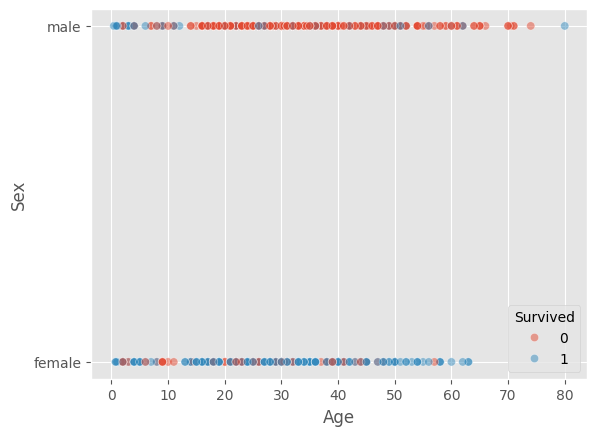

In [10]:
sns.scatterplot(x='Age', y='Sex', data=df, hue='Survived', alpha=0.5)

In [13]:
correlation_matrix = df[['Age', 'Pclass', 'Survived']].corr()
print(correlation_matrix)

               Age    Pclass  Survived
Age       1.000000 -0.369226 -0.077221
Pclass   -0.369226  1.000000 -0.338481
Survived -0.077221 -0.338481  1.000000


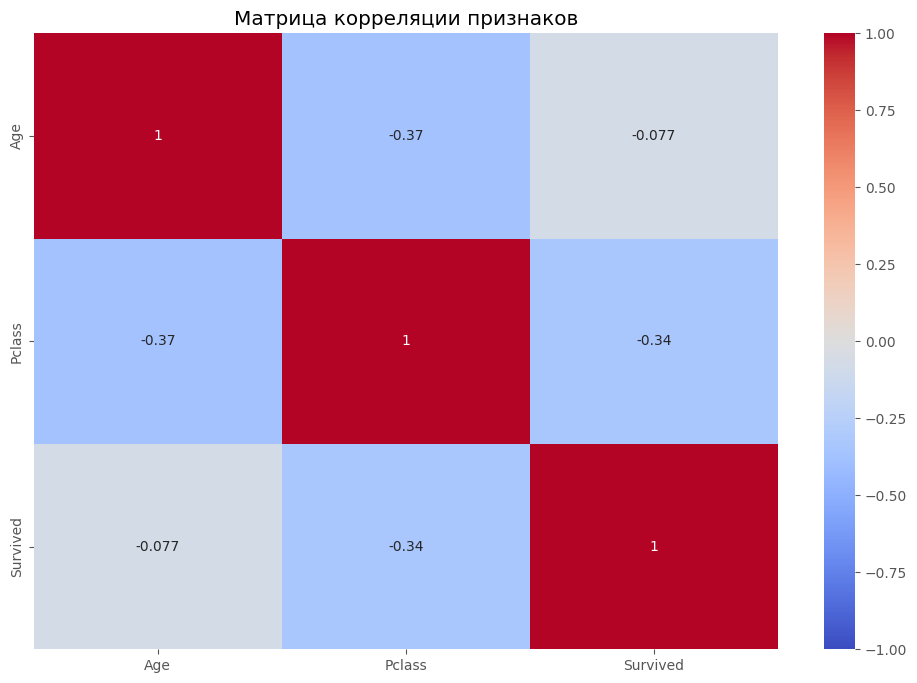

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляции признаков')
plt.show()
